# <b> active-pynference </b> : mazeX demo

Hello you ! This is a quick demo of the <b>active-pynference</b> / <b>actynf</b> package to simulate MDPs using Sophisticated Inference ! 
Buckle up buckaroo !


## 1. Introducing the task

To demonstrate the ability of the Sophisticated Inference agent to solve complex environments with numerous latent states, we will study a typical use case of the SI algorithm : the "soft maze".

Let's picture a grid made of a number of discrete cells :

DESCRIPTION OF THE SCHEME GOES HERE

On the next part of this tutorial , we'll see how to simulate various explorative behaviours using *active_pynference*.

## 2 . Using the package

### a. Install the package & import the needed packages 
<sup><sub><b> active-pynference </b> requires Python 3.x. and has been tested for Python 3.11 + but probably works well enough with slightly older versions.</sub></sup>

You can install the package by running :

```
    pip install active-pynference
```

You can find more complete documentation regarding the package installation in the installation_instructions.ipynb file.

Now that the package is successfully installed, let's explore what we can do with it !

In [1]:
# First, let's import stuff !
# Python "classics": 
import os
import numpy as np
import matplotlib.pyplot as plt


# Active Inference based packages :
import actynf # import active-pynference package
print("Imported active-pynference - version " + actynf.__version__)

Imported active-pynference - version 0.1.33


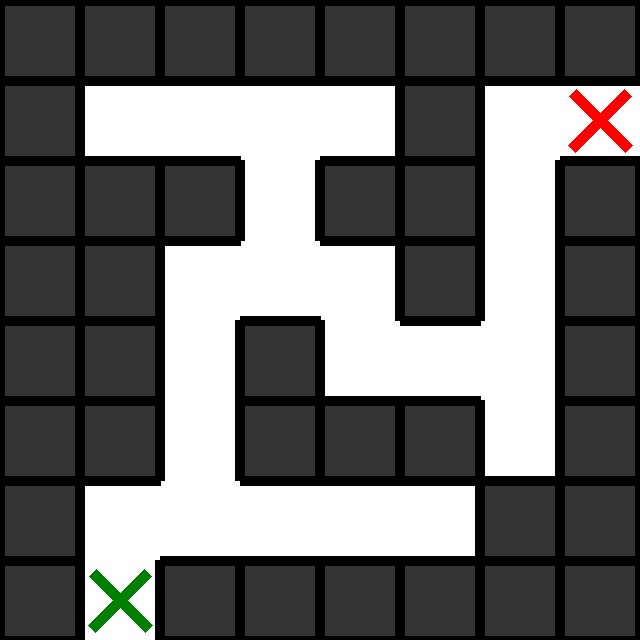

In [2]:
from demo_utils.maze_x import build_maze,build_maze_model
from demo_utils.maze_x import mazeplot

# This is the maze we're working with !
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,1],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,1,1]
])
MAZE_ARRAY = np.array([
    [1,1,1,1,1,1,1,1],
    [1,0,0,0,0,1,0,0],
    [1,1,1,0,1,1,0,1],
    [1,1,0,0,0,1,0,1],
    [1,1,0,1,0,0,0,1],
    [1,1,0,1,1,1,0,1],
    [1,0,0,0,0,0,1,1],
    [1,0,1,1,1,1,1,1]
])
START_IDX = (7,1)
END_IDX = (1,7)

# The traditional Active Inference 
# HMM associated with the maze below !
A,B,C,D,E,U = build_maze(MAZE_ARRAY,START_IDX,END_IDX)  

# Show the environment explored by the subject
maze_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX)
display(maze_img)

Above : the environment our agents will evolve in : 
- **The filled cells** are "adversive cells", the agents tries to avoid moving through them
- **The green cross** is the starting position of the agent
- **The red cross** is the goal of the agent. This preference can be encoded either through a preference only at this particular position (I highly value this specific spot but i don't value the spots directly next to it at all), or through a gradient of preferences based on the distance between each cell and this goal. To pick what kind of preference the subject starts with, you can use the *dirac_goal* boolean parameter in the model building function !

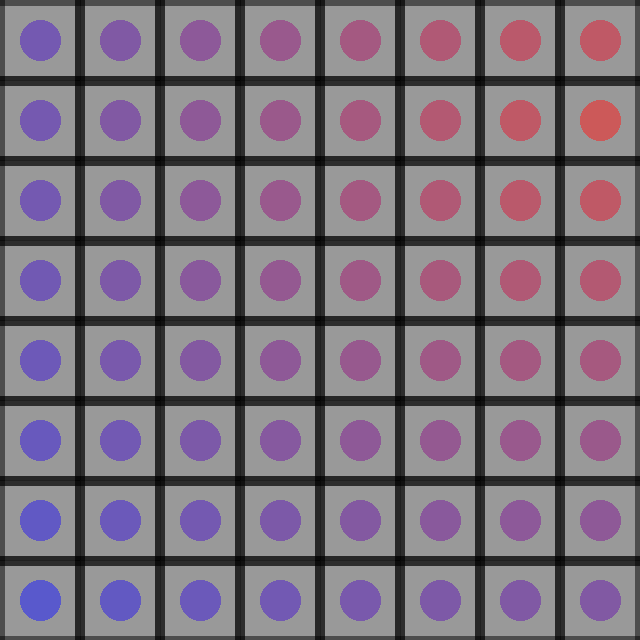

In [3]:
# The model entertained by the subject :
dirac_goal = False
a,b,c,d,e,u = build_maze_model(MAZE_ARRAY,START_IDX,END_IDX,
                               initial_tile_confidence=1.0,dirac_goal=dirac_goal)

#Show the initial model entertained by the subject
model_img = mazeplot(MAZE_ARRAY,START_IDX,END_IDX,
        t=0,
        x_d=None,o_d=None,u_d=None,
        a=a,b=None,c=c,d=None,e=None,
        show_start_and_stop=False)
display(model_img)

Above : The initial model entertained by our agents : 
- **Background :** initial belief about where the "adversive cells" are. The darker the cell, the more the agent believes it "contains" an adversive stimulus. This will evolve across trials through agent learning !
- **Foreground :** Prior preferences of the agents. Bluer cells generate less sought after outcomes and red cells generate outcomes that the agent will look for. Try changing the *dirac_goal* parameter to see how it affects the preferences of the agent !

### b. Explorative behaviour simulations

We can play on our subject initial model to elicit various types of behaviours !

 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-0;2-0])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-1;2-1])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-2;2-2])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-3;2-3])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-4;2-4])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-5;2-5])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-6;2-6])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-7;2-7])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-8;2-8])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-9;2-9])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-10;2-10])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-11;2-11])
 Network [maze] : Timestep 14 / 14
 Done !   -------- (seeds : [240-12;2-12])
 Netwo

c:\Users\annic\OneDrive\Bureau\MainPhD\code\ActivPynference_Public\demos\demo_utils\maze_x.py:570: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


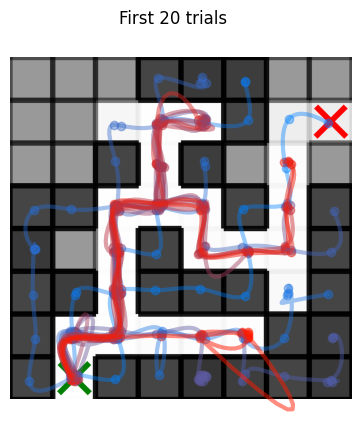

In [4]:
from demo_utils.maze_x import several_trajectory_learning_plots,all_trajectories_plots

# several_trajectory_learning_plots(MAZE_ARRAY,START_IDX,END_IDX,
#                         dirac_goal=False,alpha=3)

all_trajectories_plots(MAZE_ARRAY,START_IDX,END_IDX,
                        dirac_goal=False,alpha=3,rs=0.3)

In *actynf*, the **mdp_layer** is a generic Python class that can be used to compute observations from states and actions (a generative process) as well as infer states and actions from observations and model variables (a generative model). All the user has to do to differentiate between those behaviours is to specify it in the constructor.

Let's build the environment for our T-maze example :